# JP Morgan Chase Job Simulation - Quantitative Researcher

## Task One: Predict Natural Gas Price
Author: Stefanie Garises

In [1]:
import numpy as np
import pandas as pd
import random
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
df = pd.read_csv("input/Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [3]:
df = df.rename(columns={"Dates": "Date", "Prices": "Price"})

In [4]:
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%y').dt.strftime("%d-%m-%Y")

In [5]:
df.set_index("Date", inplace=True)

In [6]:
df.head()

,Price
Date,
31-10-2020,10.1
30-11-2020,10.3
31-12-2020,11.0
31-01-2021,10.9
28-02-2021,10.9


## EDA

In [7]:
df.describe()

,Price
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


## Normalisation

In [8]:
log_prices = np.log(1 + df.pct_change())
log_prices.tail()

,Price
Date,
31-05-2024,-0.059592
30-06-2024,0.008734
31-07-2024,0.008658
31-08-2024,-0.008658
30-09-2024,0.025752


<Axes: xlabel='Date'>

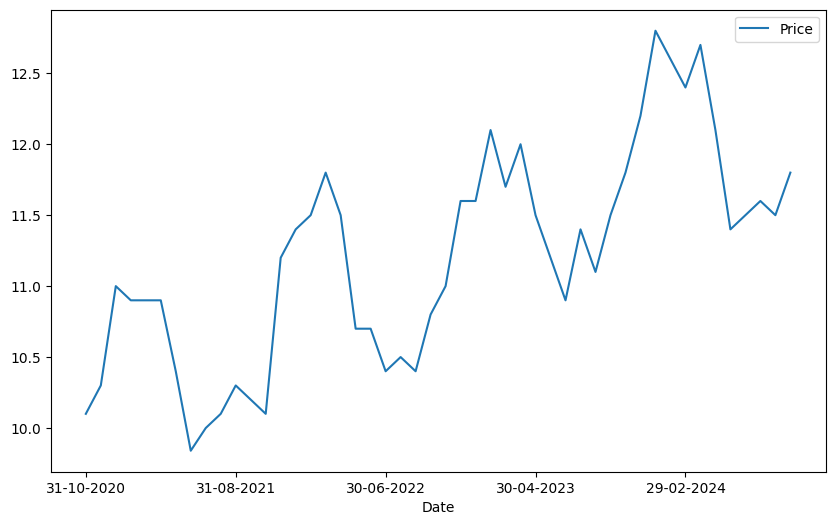

In [9]:
df.plot(figsize=(10,6))

<Axes: xlabel='Date'>

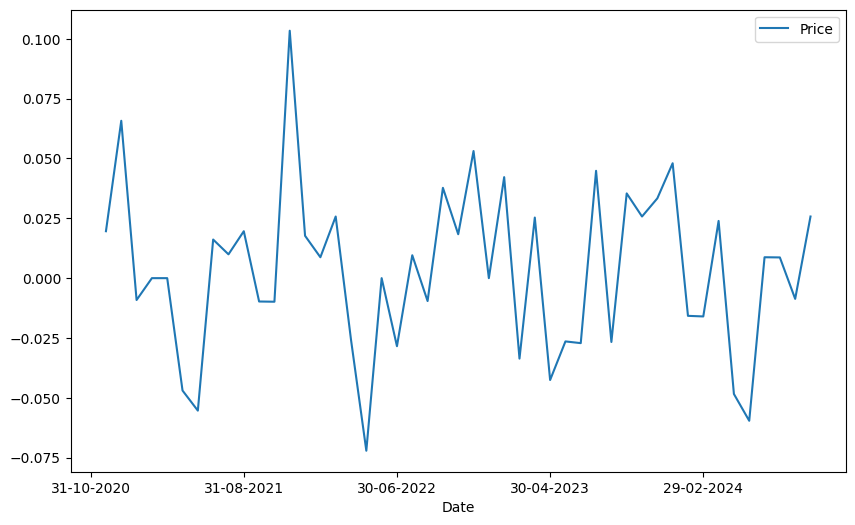

In [10]:
log_prices.plot(figsize=(10,6))

### Brownian Motion
A stochastic process for modeling time-dependent systems.

In [11]:
u = log_prices.mean()
u

Price    0.00331
dtype: float64

In [12]:
var = log_prices.var()
var

Price    0.001225
dtype: float64

Drift: (a.k.a. bias) A property of Brownian Motion which drives the process in a particular direction.

$$ drift = u - \frac{1}{2} \cdot var $$
Best approximation of future prices.

In [13]:
drift = u - (0.5 * var)
drift

Price    0.002697
dtype: float64

Volatility: A property of Brownian Motion which increases the fluctuation of the process.

In [14]:
stdev = log_prices.std()
stdev

Price    0.035006
dtype: float64

Brownian Motion:

$ r = drift + stdev * e^{r} $

In [15]:
type(drift)

pandas.core.series.Series

In [16]:
type(stdev)

pandas.core.series.Series

In [17]:
drift.values

array([0.00269717])

In [18]:
stdev.values

array([0.03500594])

Z  corresponds to the distance beteen the mean and the events, expressed as the number of standard deviations.

In [19]:
norm.ppf(0.95)

1.6448536269514722

In [20]:
x = np.random.rand(10,2)
x

array([[0.45437576, 0.62007992],
       [0.70339083, 0.24122869],
       [0.16083042, 0.95090746],
       [0.30217627, 0.5051563 ],
       [0.71536766, 0.74913951],
       [0.13406475, 0.26331645],
       [0.5968654 , 0.04027092],
       [0.22758943, 0.89324826],
       [0.42389206, 0.74269522],
       [0.408606  , 0.32130863]])

In [21]:
norm.ppf(x)

array([[-0.11461345,  0.30569069],
       [ 0.53417807, -0.70235567],
       [-0.99105067,  1.65371679],
       [-0.51815154,  0.0129253 ],
       [ 0.56913477,  0.67178436],
       [-1.10738038, -0.63315429],
       [ 0.24524183, -1.74755083],
       [-0.74680899,  1.24398934],
       [-0.19194648,  0.65167702],
       [-0.23113233, -0.46404255]])

In [22]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.41921007,  0.98020066],
       [ 1.42521478, -0.29898607],
       [ 0.10066952, -2.2510876 ],
       [ 0.96351365, -0.75321743],
       [-0.44717   , -2.17076676],
       [-0.4799878 , -0.04778676],
       [-0.19753403, -0.95625223],
       [-0.02606645, -1.63195035],
       [ 0.60894314,  0.63424922],
       [ 0.8616856 , -0.32202003]])

In [23]:
t_intervals = 365 #Price in a year
iterations = 8 #10 series of future Natural Gas price predictions.

$$ daily prices = e^{r} $$
$$ r = drift + stdev \cdot z $$

In [24]:
daily_prices = np.exp(drift.values + stdev.values + norm.ppf(np.random.rand(t_intervals, iterations)))
daily_prices

array([[0.63752012, 1.51969168, 0.82201325, ..., 1.00151417, 0.66757404,
        2.97446145],
       [1.84797738, 1.53979259, 0.39563229, ..., 2.66118116, 9.18807207,
        0.77692397],
       [0.30359842, 1.07983411, 0.43208316, ..., 1.26642685, 0.50336744,
        1.10198169],
       ...,
       [0.18222994, 1.32450203, 1.0010558 , ..., 1.62598995, 0.21816036,
        7.37244546],
       [1.47274999, 1.89622518, 5.64379322, ..., 3.73036395, 0.37015829,
        0.63304619],
       [0.73032173, 1.59069347, 0.62333481, ..., 1.82444018, 0.81698047,
        1.81542482]])

$$ S_{t} = S_{0} \cdot daily price_{t} $$
$$ S_{t+1} = S_{t} \cdot daily price_{t+1} $$
$$ ... $$
$$ S_{t+999} = S_{t+998} \cdot daily price_{t+999} $$ 

In [25]:
# To make credible predictions, the first price in our list must be the last known (current) market price
S0 = df.iloc[-1]
S0

Price    11.8
Name: 30-09-2024, dtype: float64

In [26]:
price_list = np.zeros_like(daily_prices)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
price_list[0] = S0
price_list

array([[11.8, 11.8, 11.8, ..., 11.8, 11.8, 11.8],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [28]:
daily_prices

array([[0.63752012, 1.51969168, 0.82201325, ..., 1.00151417, 0.66757404,
        2.97446145],
       [1.84797738, 1.53979259, 0.39563229, ..., 2.66118116, 9.18807207,
        0.77692397],
       [0.30359842, 1.07983411, 0.43208316, ..., 1.26642685, 0.50336744,
        1.10198169],
       ...,
       [0.18222994, 1.32450203, 1.0010558 , ..., 1.62598995, 0.21816036,
        7.37244546],
       [1.47274999, 1.89622518, 5.64379322, ..., 3.73036395, 0.37015829,
        0.63304619],
       [0.73032173, 1.59069347, 0.62333481, ..., 1.82444018, 0.81698047,
        1.81542482]])

In [29]:
daily_prices.shape

(365, 8)

In [30]:
price_list.shape

(365, 8)

In [31]:
tst_array = [price_list[t-1] * daily_prices[t] for t in range(1, t_intervals)]
tst_array

[array([ 21.8061331 ,  18.16955262,   4.66846107,  44.28530819,
         59.18527261,  31.40193768, 108.41925042,   9.16770284]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.

In [32]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_prices[t]

In [33]:
price_list

array([[1.18000000e+01, 1.18000000e+01, 1.18000000e+01, ...,
        1.18000000e+01, 1.18000000e+01, 1.18000000e+01],
       [2.18061331e+01, 1.81695526e+01, 4.66846107e+00, ...,
        3.14019377e+01, 1.08419250e+02, 9.16770284e+00],
       [6.62030751e+00, 1.96201026e+01, 2.01716342e+00, ...,
        3.97682572e+01, 5.45747210e+01, 1.01026406e+01],
       ...,
       [4.77877422e+20, 1.13187855e+03, 2.15458074e+04, ...,
        1.24496136e-01, 3.10575991e+07, 4.61818628e+05],
       [7.03793967e+20, 2.14629661e+03, 1.21600082e+05, ...,
        4.64415896e-01, 1.14962279e+07, 2.92352521e+05],
       [5.13996026e+20, 3.41410000e+03, 7.57975642e+04, ...,
        8.47299020e-01, 9.39219359e+06, 5.30744023e+05]])

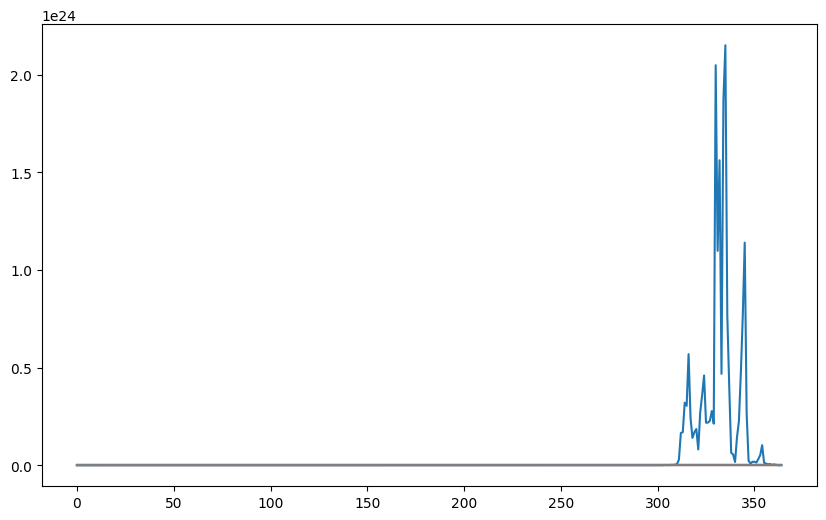

In [34]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

In [35]:
def predictGasPrice():
    date_format = "%Y-%m-%d"
    print("Enter date (Format: %Y-%m-%d):")
    future_date = dt.datetime.strptime(input(), date_format) + dt.timedelta(days=365) #Add 365 days to date entered
    print("Future Date: " + str(future_date))
    day_of_year = future_date.strftime("%j") #Get day of the year from date for random price selection
    #print(day_of_year)
    print("Natural Gas Price: " +  str(price_list[int(day_of_year)][random.randint(0,8)])) #Random price selection
    

In [48]:
predictGasPrice()

Enter date (Format: %Y-%m-%d):


 2022-04-15


Future Date: 2023-04-15 00:00:00
Natural Gas Price: 7.360996674413075
